In [ ]:
import plotly as py
import plotly.graph_objs as go
import shapefile
import numpy as np
import matplotlib.pyplot as plt

shp_file_base='Malaysiapoly17'
sf = shapefile.Reader(shp_file_base)

len(sf.shapes())

In [ ]:
def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [ ]:
import pandas as pd

df = read_shapefile(sf)
df.shape

In [ ]:
df.sample(16)

In [ ]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (18,7)):
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+2
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
plot_map(sf)


import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt

sf = shp.Reader("Malaysiapoly17.shp")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

In [ ]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [ ]:
comuna = 'Sabah'
com_id = df[df.locname == comuna].index.get_values()[0]
plot_shape(com_id, comuna)

Record #1: [4444908, 'MYS', 'Kedah', 'Kedah', 'Kedah', '', 'administrative', 4, 'Q188947', 'en:Kedah', '2018-10-11 06:14:31', '', '4444908,2108121,0', 'MY-02']
(16, 15)
         id country        name      enname               locname offname  \
12  3879783     MYS       Sabah                             Sabah           
15  4444411     MYS  Terengganu  Terengganu  Terengganu / ???????           
8   4445131     MYS      Penang      Penang          Pulau Pinang           
14  2932285     MYS    Selangor                          Selangor           
11  4443881     MYS   Putrajaya                         Putrajaya           

          boundary  adminlevel wikidata      wikimedia            timestamp  \
12  administrative           4  Q179029     lt:Sabahas  2018-10-11 06:14:31   
15  administrative           4  Q189701  en:Terengganu  2018-10-11 06:14:31   
8   administrative           4  Q188096      en:Penang  2018-10-11 06:14:31   
14  administrative           4  Q189710    en:Selang

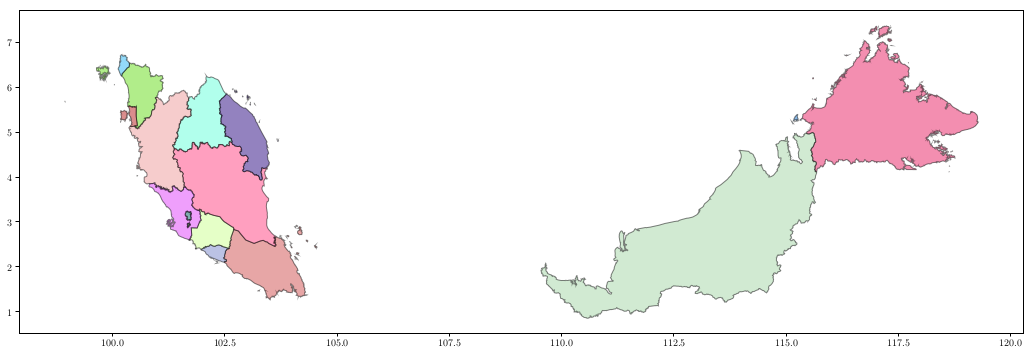

In [78]:
# pip install descartes
from descartes import PolygonPatch
import shapefile
import plotly as py
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt

colors = ["#d14f4f", "#64dd17", "#64ffda", "#006064", "#1976d2", "#7986cb", "#ccff90", "#ff4081", "#b71c1c", "#ef9a9a", "#29b6f6", "#003d00", "#e91e63", "#a5d6a7", "#e040fb", "#280680"]
count = 0
sf=shapefile.Reader('Malaysiapoly17')

print(sf.records()[1])
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df


df = read_shapefile(sf)
print(df.shape)
print(df.sample(5))

figsize = (18,7)
fig = plt.figure(figsize = figsize) 
ax = fig.gca() 
for poly in sf.shapes():
    poly_geo=poly.__geo_interface__
    ax.add_patch(PolygonPatch(poly_geo, fc=colors[count], ec='#000000', alpha=0.5, zorder=2 ))
    count += 1

ax.axis('scaled')

plt.show()

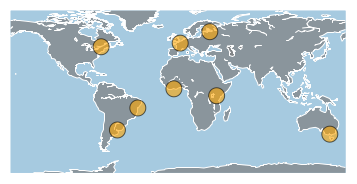

In [42]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

 
# Make a data frame with the GPS of a few cities:
data = pd.DataFrame({
'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador']
})
 
# A basic map
m=Basemap(llcrnrlon=-160, llcrnrlat=-75,urcrnrlon=160,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
 
# Add a marker per city of the data frame!
m.plot(data['lat'], data['lon'], linestyle='none', marker="o", markersize=16, alpha=0.6, c="orange", markeredgecolor="black", markeredgewidth=1)
